# Importing Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
import scipy
import cv2
import math

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

colors = [(0, 0, 0), (1, 0, 0)] # first color is black, last is red
cm = LinearSegmentedColormap.from_list(
        "Custom", colors, N=1000)

# Loading Images

In [102]:
architecture_noisy1 = np.array(skimage.io.imread('architecture_noisy1.png'))
architecture_noisy2 = np.array(skimage.io.imread('architecture_noisy2.png'))
book_noisy1 = np.array(skimage.io.imread('book_noisy1.png'))
book_noisy2 = np.array(skimage.io.imread('book_noisy2.png'))
building_noisy = np.array(skimage.io.imread('building_noisy.png'))
synthetic_image = cv2.cvtColor(np.array(skimage.io.imread('Synthetic image.png')), cv2.COLOR_RGB2GRAY)
occluded_synthetic_image = cv2.cvtColor(np.array(skimage.io.imread('Occluded Synthetic image.png')), cv2.COLOR_RGB2GRAY)
real_image = cv2.cvtColor(np.array(skimage.io.imread('Real Image.png')), cv2.COLOR_RGB2GRAY)

# **Q1. Image Denoising:**
(a) Use the bilateral filter to denoise the image `building noisy.png` corrupted by the Gaussian noise and compare the results with the Gaussian smoothing. Use a window size of $7 × 7$ and tune the other parameters to get a good result.

(b) Apply Laplace filter on the input image, bilateral filtered image and the Gaussian smoothed
image. What do you observe from the results?

In [16]:
def denoise_bilateral(I,Kg,Kh,sigma_g,sigma_h,window_size):

  x = np.arange(-int(window_size/2),int(window_size/2)+1,1)
  y = np.arange(-int(window_size/2),int(window_size/2)+1,1)

  xv,yv = np.meshgrid(x,y)

  G = Kg*np.exp(-(xv**2+yv**2)/(2*sigma_g**2))

  def bilateral(k):
    return Kh*math.exp(-k**2/(2*sigma_h**2))

  def get_image_patch(I,i,j):
    image_patch = np.zeros((window_size,window_size))
    for m in range(window_size):
      for n in range(window_size):
        if (i+m-(window_size//2)>=0 and i+m-(window_size//2)<=len(I)-1) and (j+n-(window_size//2)>=0 and j+n-(window_size//2)<=len(I[0])-1):
          image_patch[m][n] = I[i+m-window_size//2][j+n-window_size//2]
        else:
          image_patch[m][n] = 0
    return image_patch

  J = np.zeros((len(I),len(I[0])))

  for i in range(len(I)):
    for j in range(len(I[0])):

      image_patch = get_image_patch(I,i,j)

      H_values = image_patch - image_patch[window_size//2][[window_size//2]]
      H = Kh*np.exp(-(H_values**2)/(2*sigma_h**2))

      GH = G*H
      GH = GH/np.sum(GH)


      J[i][j] = np.sum(image_patch * GH)

  J = J - np.min(J)
  J = np.array(np.round(J*255/np.max(J)),dtype='int')

  return J

In [17]:
def denoise_gaussian(I,Kg,sigma_g,window_size):

  x = np.arange(-int(window_size/2),int(window_size/2)+1,1)
  y = np.arange(-int(window_size/2),int(window_size/2)+1,1)

  xv,yv = np.meshgrid(x,y)

  G = Kg*np.exp(-(xv**2+yv**2)/(2*sigma_g**2))

  output_image = scipy.signal.convolve2d(I,G,mode='same',boundary='symm')

  output_image = output_image - np.min(output_image)
  output_image = np.array(np.round(output_image*255/np.max(output_image)),dtype='int')

  return output_image

In [18]:
filtered_img_bilateral = denoise_bilateral(building_noisy,1,1,100,50,7)

In [19]:
filtered_img_gaussian = denoise_gaussian(building_noisy,1,10,7)

Text(0.5, 1.0, 'Denoised by Gaussian')

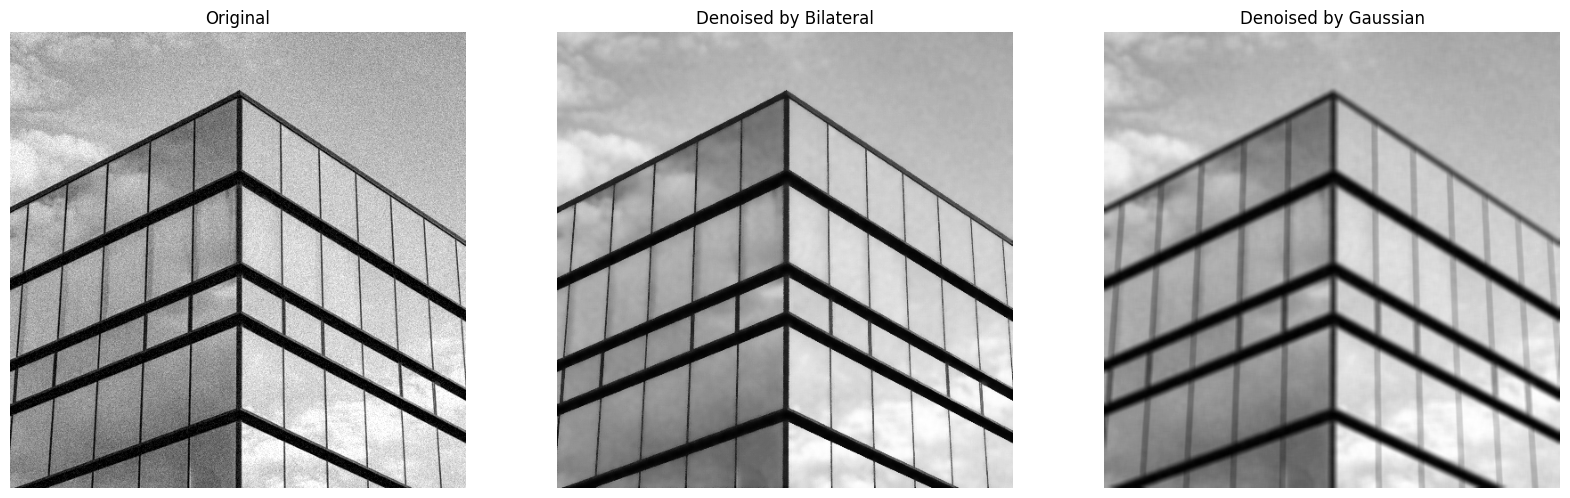

In [20]:
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(building_noisy,cmap='gray')
plt.axis('off')
plt.title('Original')
plt.subplot(1,3,2)
plt.imshow(filtered_img_bilateral,cmap='gray')
plt.axis('off')
plt.title('Denoised by Bilateral')
plt.subplot(1,3,3)
plt.imshow(filtered_img_gaussian,cmap='gray')
plt.axis('off')
plt.title('Denoised by Gaussian')

In [21]:
def filter_Laplace(I):

  kernel = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])

  output_image = scipy.signal.convolve2d(I,kernel)

  return output_image

In [22]:
laplace_filter_original = filter_Laplace(building_noisy)
laplace_filter_bilateral = filter_Laplace(filtered_img_bilateral)
laplace_filter_gaussian = filter_Laplace(filtered_img_gaussian)

Text(0.5, 1.0, 'Laplace on Gaussian')

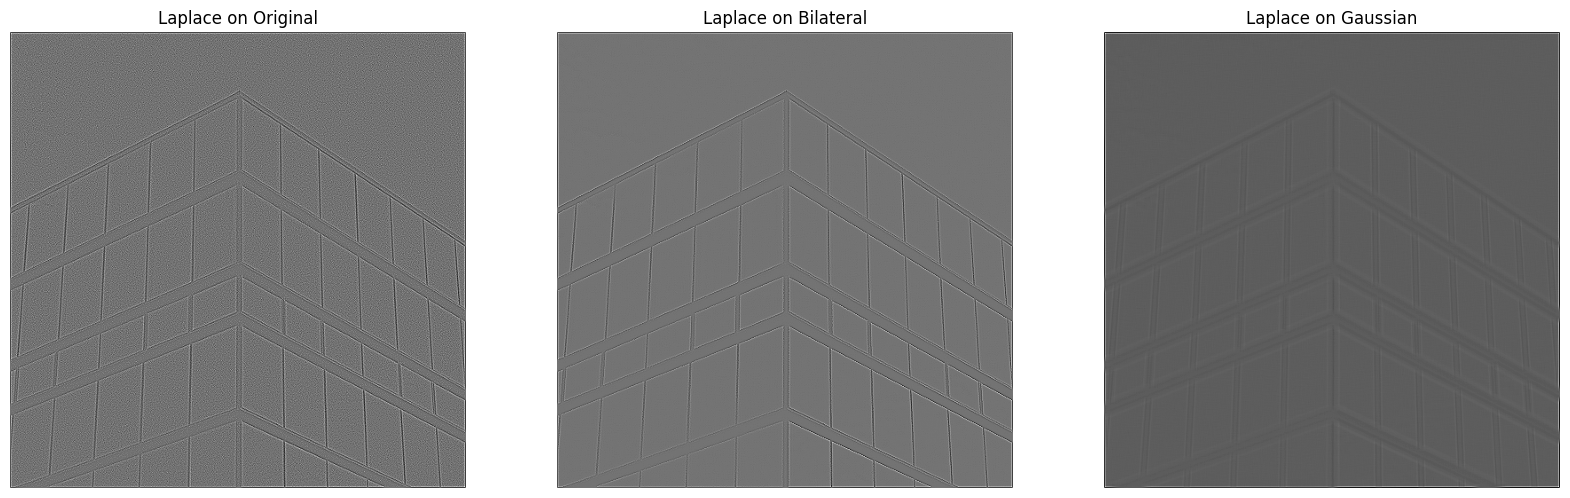

In [23]:
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(laplace_filter_original,cmap='gray')
plt.axis('off')
plt.title('Laplace on Original')
plt.subplot(1,3,2)
plt.imshow(laplace_filter_bilateral,cmap='gray')
plt.axis('off')
plt.title('Laplace on Bilateral')
plt.subplot(1,3,3)
plt.imshow(laplace_filter_gaussian,cmap='gray')
plt.axis('off')
plt.title('Laplace on Gaussian')

# **Q2. Edge Detection:**
Perform edge detection on `book_noisy1.png`, `book_noisy2.png`, `architecture_noisy1.png` and `architecture_noisy2.png` based on the following instructions:

(a) First smooth the images using a spatial domain Gaussian filter.

(b) Use one of the gradient based edge detectors to calculate gradients and compute the edges using thresholding.

(c) Analyse
- What is the effect of the amount of Gaussian smoothing on the detected edges.
- What is the effect of the gradient threshold on the detected edges?

In [6]:
# Smoothening the noisy images using Gaussian

smoothened_book_noisy1 = denoise_gaussian(book_noisy1,1,50,3)
smoothened_book_noisy2 = denoise_gaussian(book_noisy2,1,50,15)
smoothened_architecture_noisy1 = denoise_gaussian(architecture_noisy1,1,50,3)
smoothened_architecture_noisy2 = denoise_gaussian(architecture_noisy2,1,50,15)

In [7]:
def detect_edge(I,operator,threshold):

  sobel = {'x' : [[-1,0,1],[-2,0,2],[-1,0,1]], 'y': [[-1,-2,-1],[0,0,0],[1,2,1]]}   # Defining sobel operator
  prewitt = {'x' : [[-1,0,1],[-1,0,1],[-1,0,1]], 'y' : [[-1,-1,-1],[0,0,0],[1,1,1]]} # Defining prewitt operator
  robert = {'x' : [[1,0],[0,-1]], 'y' : [[0,-1],[1,0]]}                         # Defining robert operator

  edge_detectors = {'sobel' : sobel, 'prewitt': prewitt, 'robert' : robert}

  edge_x = scipy.signal.convolve2d(I,edge_detectors[operator]['x'],boundary = 'symm')
  edge_y = scipy.signal.convolve2d(I,edge_detectors[operator]['y'],boundary = 'symm')

  edge_map = (edge_x**2 + edge_y**2)**0.5

  edge_map = edge_map - np.min(edge_map)
  edge_map = np.array(np.round(edge_map*255/np.max(edge_map)),dtype='int')

  return edge_map>threshold

In [8]:
edge_book_noisy1 = detect_edge(smoothened_book_noisy1,operator = 'sobel',threshold = 30)
edge_book_noisy2 = detect_edge(smoothened_book_noisy2,operator = 'sobel',threshold = 60)
edge_architecture_noisy1 = detect_edge(smoothened_architecture_noisy1,operator = 'sobel',threshold = 30)
edge_architecture_noisy2 = detect_edge(smoothened_architecture_noisy2,operator = 'sobel',threshold = 60)

Text(0.5, 1.0, 'Detected Edge')

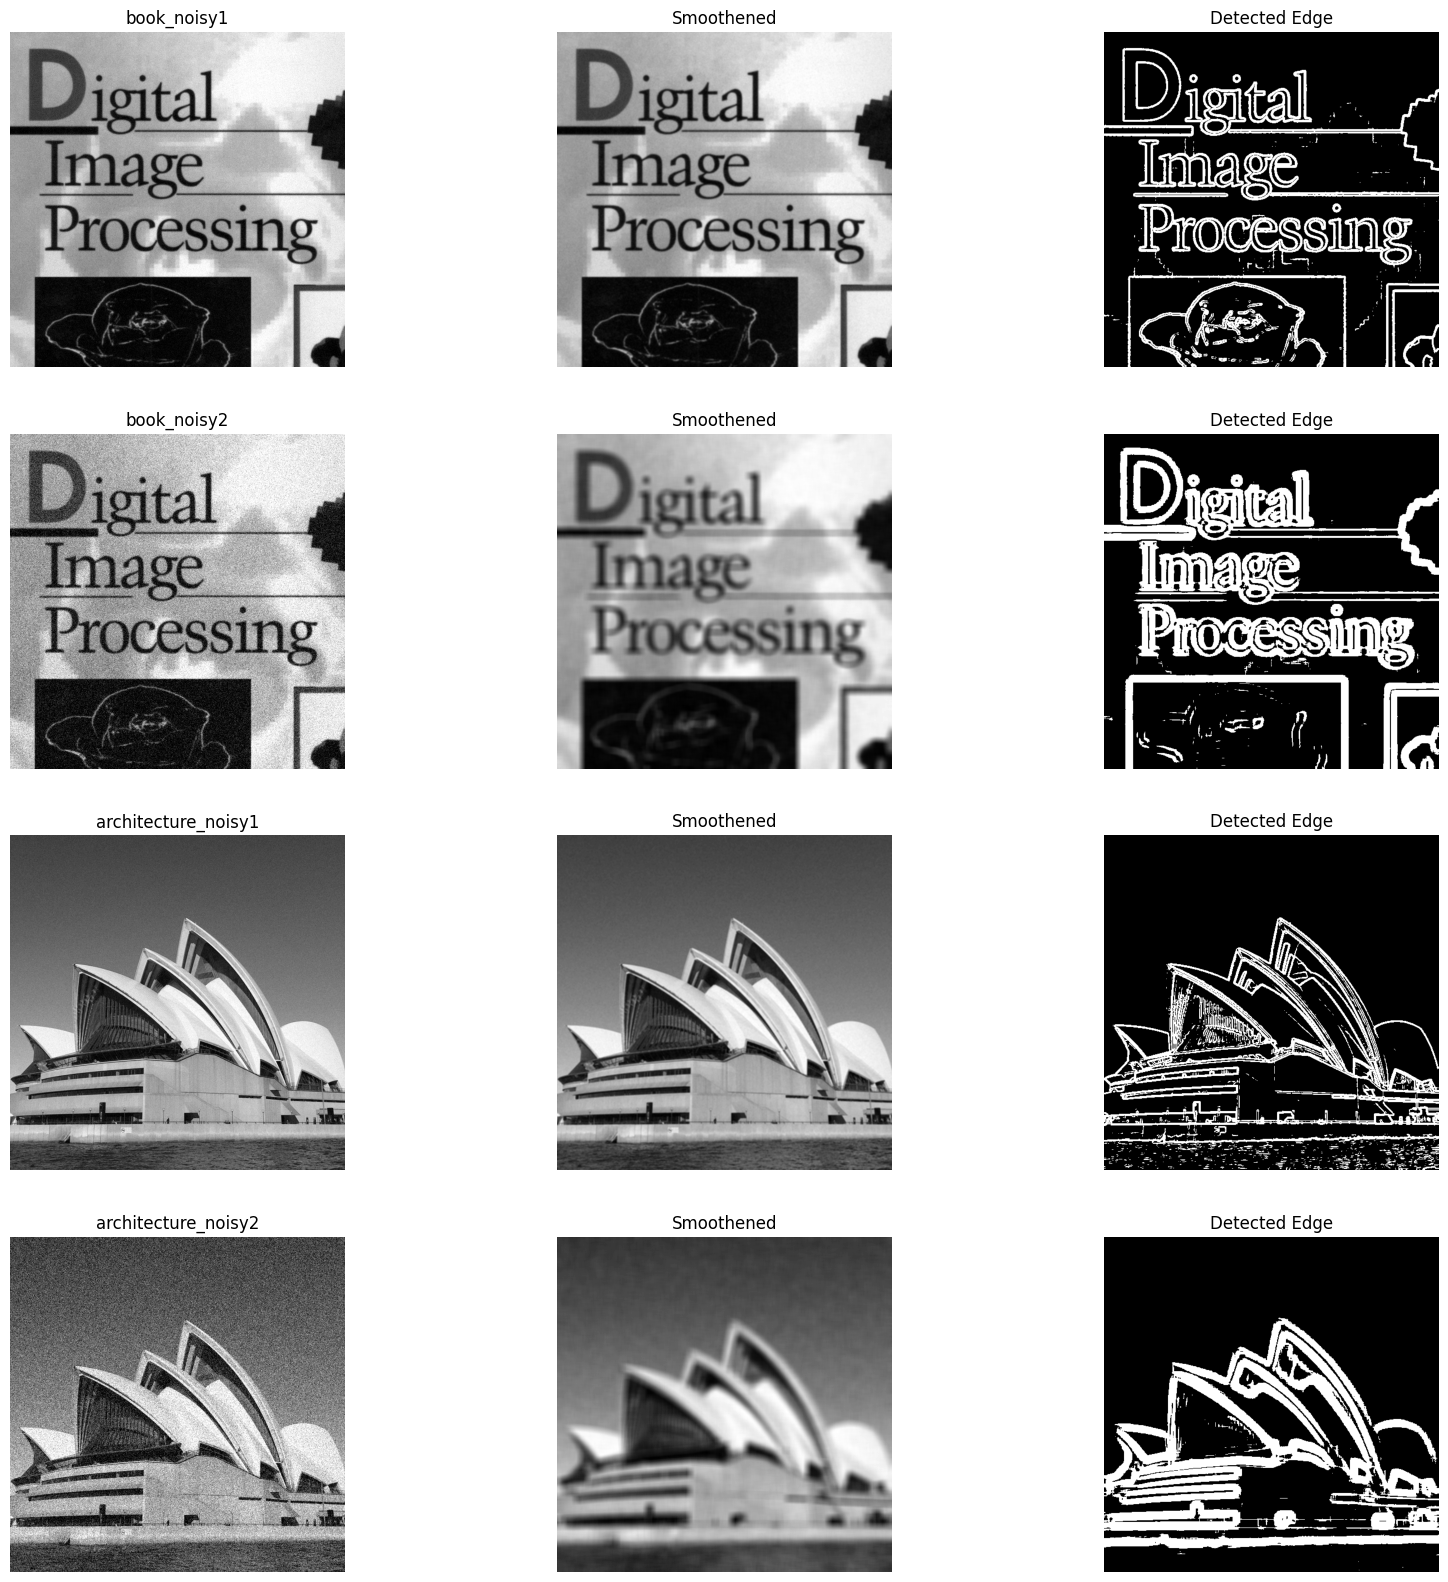

In [9]:
plt.figure(figsize=(20,20))

plt.subplot(4,3,1)
plt.imshow(book_noisy1,cmap='gray')
plt.axis('off')
plt.title('book_noisy1')
plt.subplot(4,3,2)
plt.imshow(smoothened_book_noisy1,cmap='gray')
plt.axis('off')
plt.title('Smoothened')
plt.subplot(4,3,3)
plt.imshow(edge_book_noisy1,cmap='gray')
plt.axis('off')
plt.title('Detected Edge')

plt.subplot(4,3,4)
plt.imshow(book_noisy2,cmap='gray')
plt.axis('off')
plt.title('book_noisy2')
plt.subplot(4,3,5)
plt.imshow(smoothened_book_noisy2,cmap='gray')
plt.axis('off')
plt.title('Smoothened')
plt.subplot(4,3,6)
plt.imshow(edge_book_noisy2,cmap='gray')
plt.axis('off')
plt.title('Detected Edge')

plt.subplot(4,3,7)
plt.imshow(architecture_noisy1,cmap='gray')
plt.axis('off')
plt.title('architecture_noisy1')
plt.subplot(4,3,8)
plt.imshow(smoothened_architecture_noisy1,cmap='gray')
plt.axis('off')
plt.title('Smoothened')
plt.subplot(4,3,9)
plt.imshow(edge_architecture_noisy1,cmap='gray')
plt.axis('off')
plt.title('Detected Edge')

plt.subplot(4,3,10)
plt.imshow(architecture_noisy2,cmap='gray')
plt.axis('off')
plt.title('architecture_noisy2')
plt.subplot(4,3,11)
plt.imshow(smoothened_architecture_noisy2,cmap='gray')
plt.axis('off')
plt.title('Smoothened')
plt.subplot(4,3,12)
plt.imshow(edge_architecture_noisy2,cmap='gray')
plt.axis('off')
plt.title('Detected Edge')

# **Q3. Hough Transform:**
Create a synthetic image with few lines and other shapes. Implement Hough
transform to detect lines. Try different number of bins and thresholds and observe whether the
lines are detected. Analyze how the results are affected by
- (i) noise
- (ii) occlusions
- (iii) real images

## Hough Transform Algorithm

In [58]:
def Hough_Transform(I,degree_resolution,Accumulator_threshold,edge_threshold):

  M = len(I)                                                                    # Number of rows of Image
  N = len(I[0])                                                                 # Number of columns of Image
  d_max = int(math.sqrt(M**2+N**2))                                             # Maximum possible distance of line from [0,0]

  number_of_theta_bins = int(180/degree_resolution)

  edge_image = detect_edge(I,operator='sobel',threshold=edge_threshold)         # Computing Edge map of Image

  detected_line_image = np.array([[ (I[i][j],I[i][j],I[i][j]) for j in range(N)] for i in range(M)])
  detected_line_image = detected_line_image.astype(np.uint8)

  Accumulator_array = np.zeros((2*d_max,number_of_theta_bins))                  # Initializing Accumulator Array

  for i in range(M):
    for j in range(N):
      if edge_image[i][j] == 1:                                                 # Locations of edge

        for degree_index in range(number_of_theta_bins):

          radian = ((-90+degree_resolution*degree_index)*(math.pi/180))         # Converting degree to radian

          d = j*math.cos(radian) + i*math.sin(radian)                           # Calculating d

          d_index = int(d)                                                      # Choosing appropriate index of the accumulator along d axis

          Accumulator_array[d_max+d_index][degree_index]+=1                     # Incrementing appropriate accumulator cell by 1

  thresholded_accumulator = Accumulator_array>Accumulator_threshold             # Thresholding the Accumulator

  lines = []                                                                    # Iniatializing empty list to store (d,theta) values
  for i in range(len(thresholded_accumulator)):
    for j in range(len(thresholded_accumulator[0])):
      if thresholded_accumulator[i][j]==1:
        lines.append([i,j])

  for d_index,degree_index in lines:                                            # Drawing each line on original image

    theta = ((-90+degree_resolution*degree_index)*math.pi/180)
    d =  d_index - d_max

    x1 = int(d*math.cos(theta) - d_max*math.sin(theta))

    y1 = int(d*math.sin(theta) + d_max*math.cos(theta))

    x2 = int(d*math.cos(theta) + d_max*math.sin(theta))

    y2 = int(d*math.sin(theta) - d_max*math.cos(theta))

    cv2.line(detected_line_image,(x1,y1),(x2,y2),(255,0,255),2)                 # Drawing detected lines on original image


  print(str(len(lines))+' Lines Detected')

  return detected_line_image,Accumulator_array,edge_image,d_max

## Synthetic Image

In [129]:
synthetic_image_hough = Hough_Transform(synthetic_image,0.5,300,10)

29 Lines Detected


Text(0.5, 1.0, 'Detected Lines')

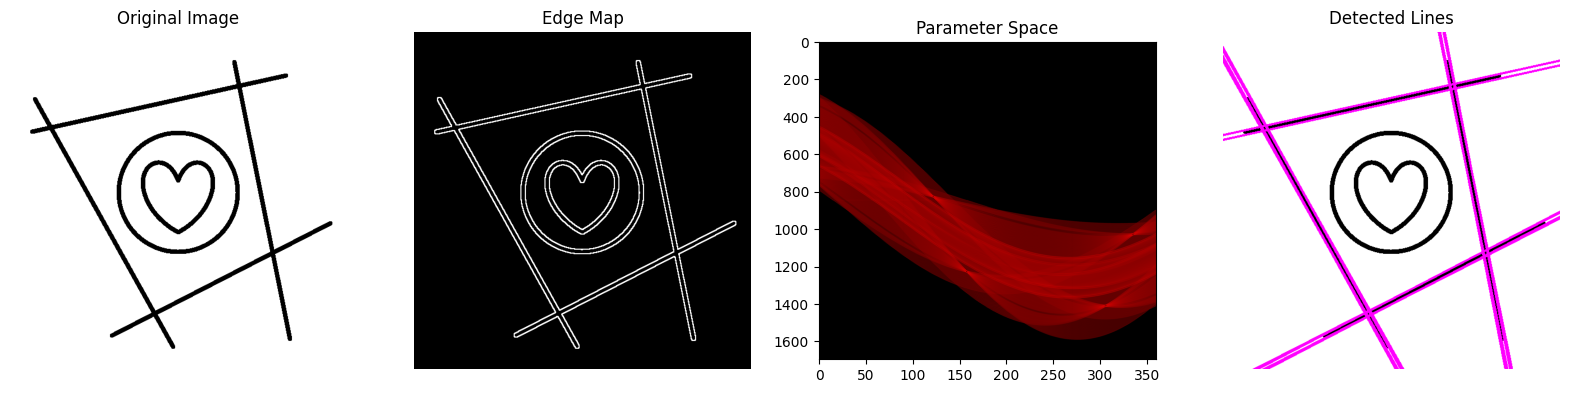

In [132]:
plt.figure(figsize = (20,20))
plt.subplot(1,4,1)
plt.imshow(synthetic_image,cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.subplot(1,4,2)
plt.imshow(synthetic_image_hough[2],cmap='gray')
plt.axis('off')
plt.title('Edge Map')
plt.subplot(1,4,3)
plt.imshow(np.log(1+synthetic_image_hough[1]),cmap=cm,aspect = 0.2)
plt.title('Parameter Space')
plt.subplot(1,4,4)
plt.imshow(synthetic_image_hough[0])
plt.axis('off')
plt.title('Detected Lines')

## (i) Noisy Synthetic Image

In [134]:
noise = np.array([[np.random.normal(0,40) for i in range(len(synthetic_image))] for j in range(len(synthetic_image[0]))])
noisy_synthetic_image = synthetic_image + noise

#FSCS
noisy_synthetic_image = noisy_synthetic_image - np.min(noisy_synthetic_image)
noisy_synthetic_image = noisy_synthetic_image*255/np.max(noisy_synthetic_image)
noisy_synthetic_image = np.array(noisy_synthetic_image,dtype='int')

In [143]:
noisy_synthetic_image_hough = Hough_Transform(noisy_synthetic_image,1,250,45)

40 Lines Detected


Text(0.5, 1.0, 'Detected Lines')

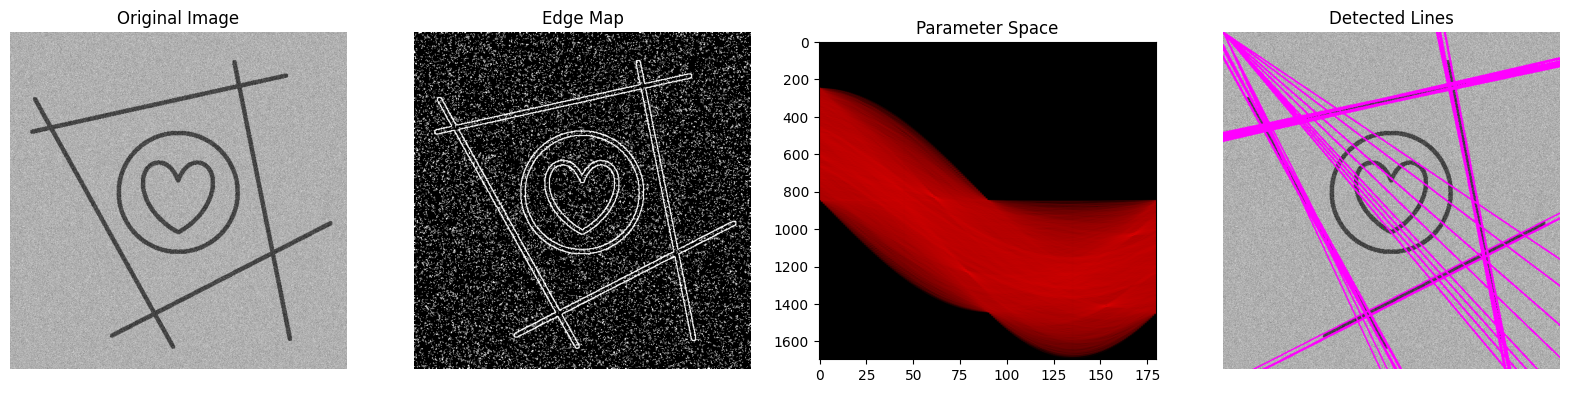

In [144]:
plt.figure(figsize = (20,20))
plt.subplot(1,4,1)
plt.imshow(noisy_synthetic_image,cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.subplot(1,4,2)
plt.imshow(noisy_synthetic_image_hough[2],cmap='gray')
plt.axis('off')
plt.title('Edge Map')
plt.subplot(1,4,3)
plt.imshow(np.log(1+noisy_synthetic_image_hough[1]),cmap=cm,aspect = 0.1)
plt.title('Parameter Space')
plt.subplot(1,4,4)
plt.imshow(noisy_synthetic_image_hough[0])
plt.axis('off')
plt.title('Detected Lines')

## (ii) Occluded Image

In [147]:
occluded_synthetic_image_hough = Hough_Transform(occluded_synthetic_image,1,270,10)

7 Lines Detected


Text(0.5, 1.0, 'Detected Lines')

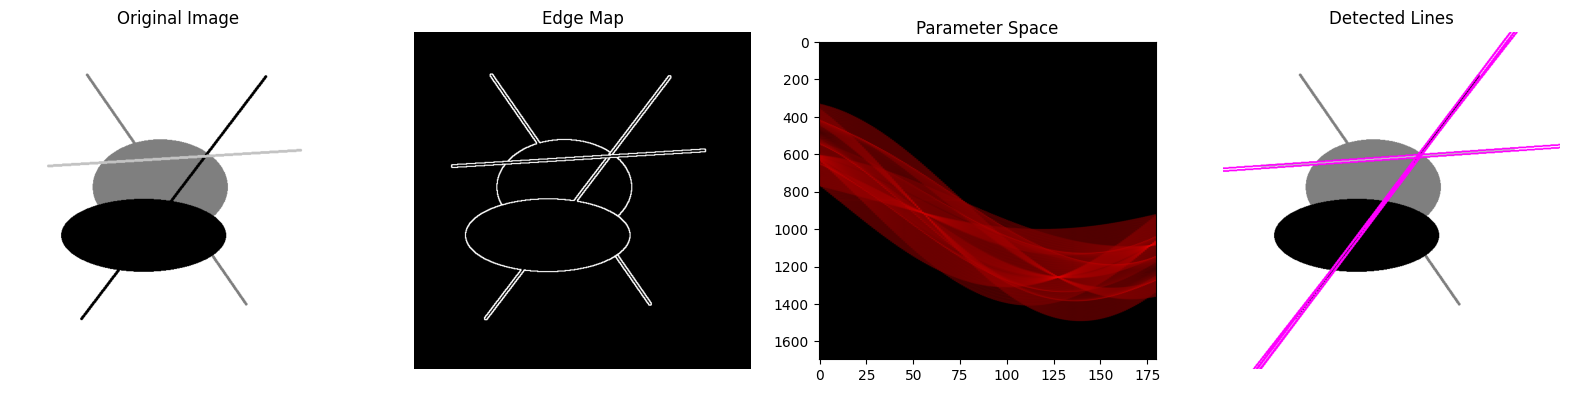

In [148]:
plt.figure(figsize = (20,20))
plt.subplot(1,4,1)
plt.imshow(occluded_synthetic_image,cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.subplot(1,4,2)
plt.imshow(occluded_synthetic_image_hough[2],cmap='gray')
plt.axis('off')
plt.title('Edge Map')
plt.subplot(1,4,3)
plt.imshow(np.log(1+occluded_synthetic_image_hough[1]),cmap=cm,aspect = 0.1)
plt.title('Parameter Space')
plt.subplot(1,4,4)
plt.imshow(occluded_synthetic_image_hough[0])
plt.axis('off')
plt.title('Detected Lines')

## (iii)Real Image

In [75]:
real_image_hough = Hough_Transform(filtered_img_bilateral,1,250,30)

79 Lines Detected


Text(0.5, 1.0, 'Detected Lines')

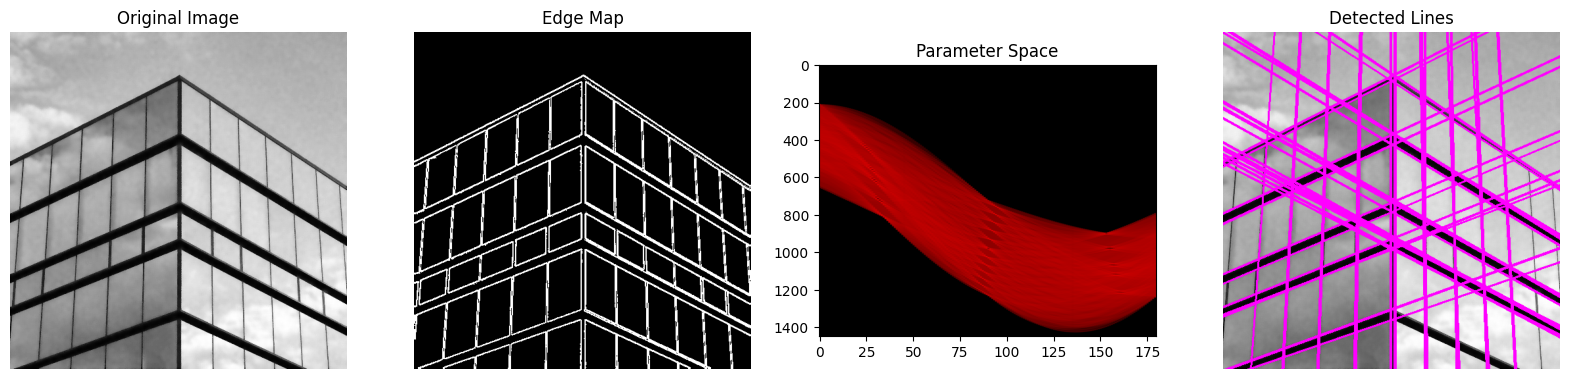

In [76]:
plt.figure(figsize = (20,20))
plt.subplot(1,4,1)
plt.imshow(real_image,cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.subplot(1,4,2)
plt.imshow(real_image_hough[2],cmap='gray')
plt.axis('off')
plt.title('Edge Map')
plt.subplot(1,4,3)
plt.imshow(np.log(1+real_image_hough[1]),cmap=cm,aspect = 0.1)
plt.title('Parameter Space')
plt.subplot(1,4,4)
plt.imshow(real_image_hough[0])
plt.axis('off')
plt.title('Detected Lines')

In [152]:
real_image_hough = Hough_Transform(real_image,1,450,50)

17 Lines Detected


Text(0.5, 1.0, 'Detected Lines')

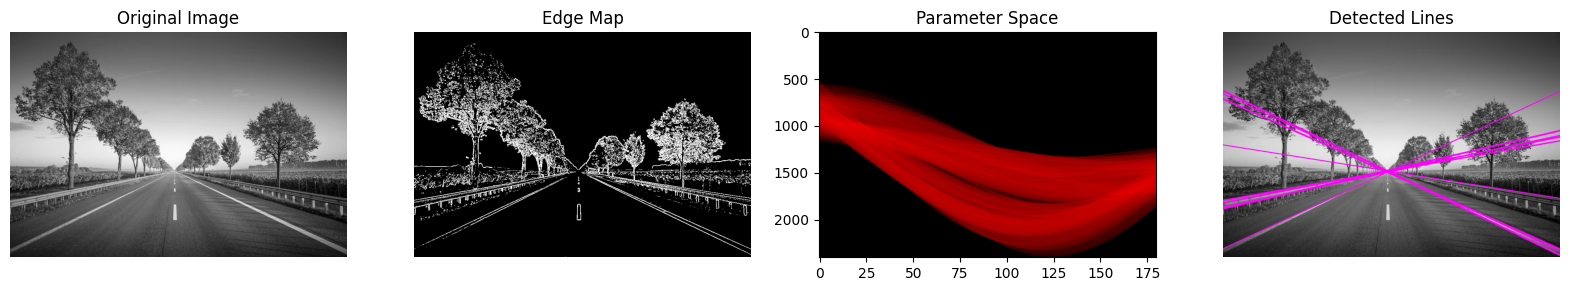

In [153]:
plt.figure(figsize = (20,20))
plt.subplot(1,4,1)
plt.imshow(real_image,cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.subplot(1,4,2)
plt.imshow(real_image_hough[2],cmap='gray')
plt.axis('off')
plt.title('Edge Map')
plt.subplot(1,4,3)
plt.imshow(np.log(1+real_image_hough[1]),cmap=cm,aspect = 0.05)
plt.title('Parameter Space')
plt.subplot(1,4,4)
plt.imshow(real_image_hough[0])
plt.axis('off')
plt.title('Detected Lines')